In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [62]:
df = pd.read_csv('TSLA.CSV')

In [63]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [64]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0
757,2022-05-20,713.989990,721.580017,633.000000,663.900024,48190600,0,0.0


In [65]:
## We would only deal with the closing price for simpler anaysis

df.drop(['Open', 'High',	'Low',	'Volume',	'Dividends',	'Stock Splits'], axis=1, inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [67]:
## Converting the datatype of 'Date' to datetime 

df['Date'] = pd.to_datetime(df['Date'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [69]:
## Making the 'Date' column as the index column for convenience

df = df.set_index('Date')

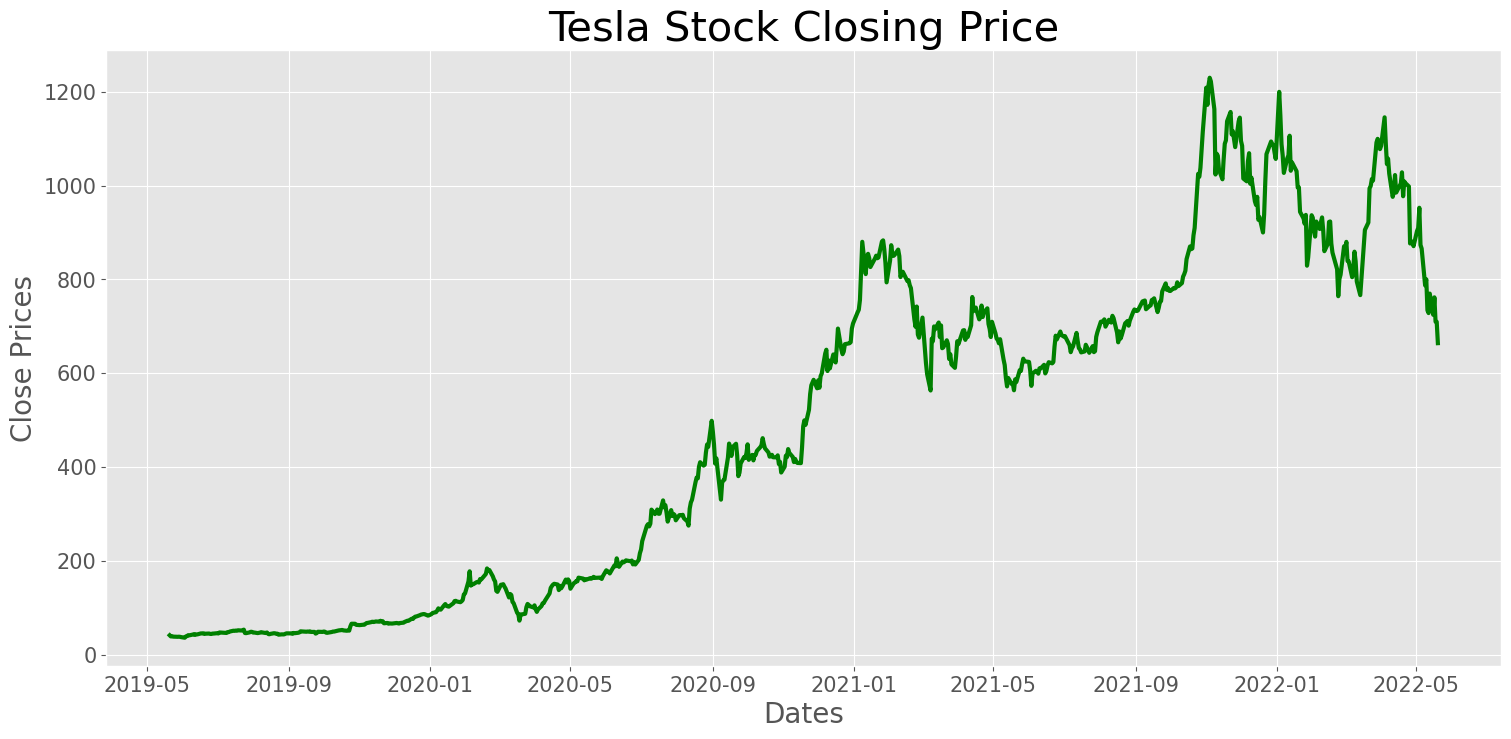

In [70]:
# Plotting close price

plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(df, linewidth = 3, color = 'green')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

We can clearly notice an upward trend in the close price over the time.

## Model Building

Here we would construct an ARIMA model. In ARIMA model we do not need to pass a stationary data converetd from a non-stationary data. The ARIMA model cam itself handle non-stationary data. The model would autometically perform the level of differencing that would be required to make it stationary. So we can pass the original data 'df' into out ARIMA model. 

In [71]:
## Train-Test Split

training_data = df['Close'][0:-60]
test_data = df['Close'][-60:]

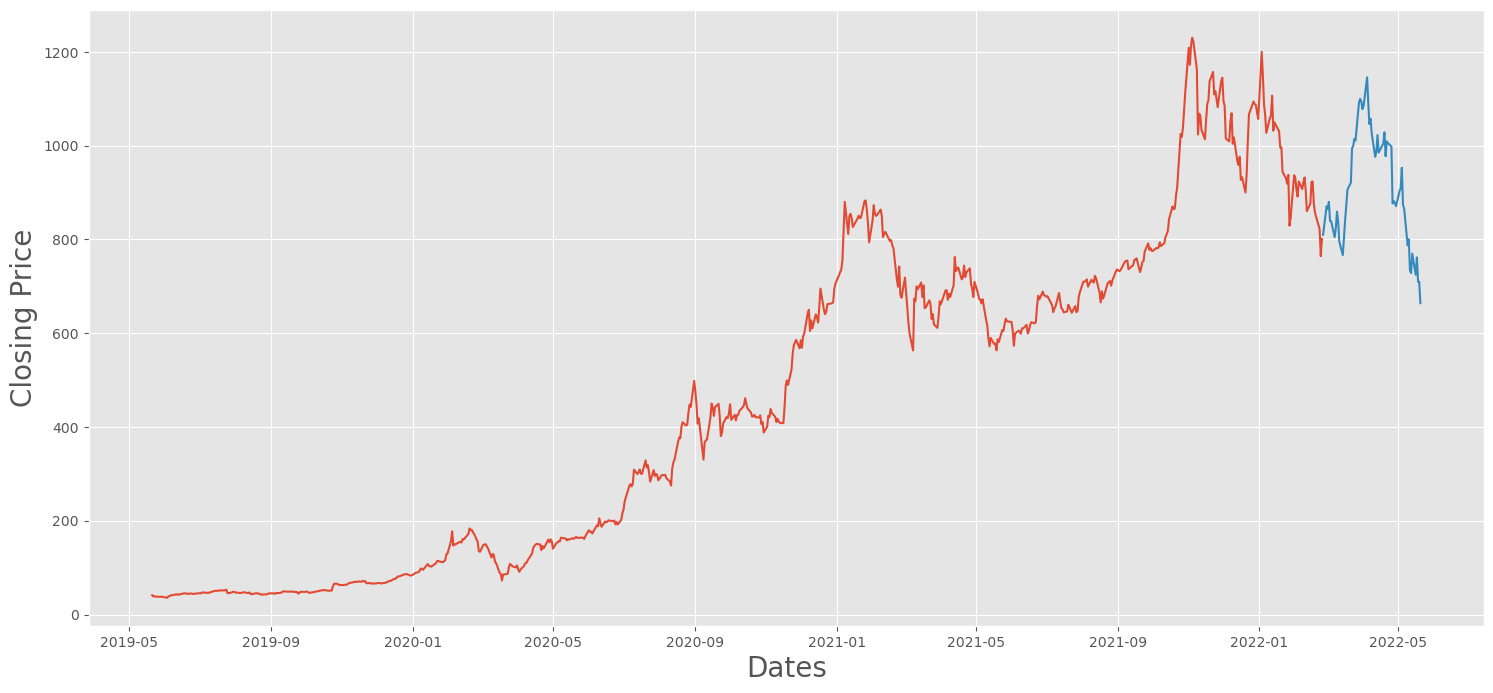

In [72]:
plt.figure(figsize=(18,8))
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Closing Price', fontsize=20)
plt.plot(training_data)
plt.plot(test_data)

All the red data points are training data and all the blue data points are test data. 

In [73]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
history = [i for i in training_data]

In [75]:
history[0:10]

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125]

In [76]:
model = ARIMA(history, order=(1,1,1))

In [77]:
model_training = model.fit()

In [78]:
model_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Wed, 20 Sep 2023   AIC                           6306.700
Time:                        19:11:50   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
forecast = model_training.forecast(len(test_data.array))

These are the next 10 forcasted values that comes after the historical data 'history'.

In [108]:
test = test_data[0:len(test_data.array)].array

These are the next 10 actual values that comes after the historical data 'history'.

In [109]:
forecast

array([800.20438321, 800.06879735, 800.03629673, 800.02850617,
       800.02663874, 800.0261911 , 800.0260838 , 800.02605808,
       800.02605192, 800.02605044, 800.02605009, 800.02605   ,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998,
       800.02604998, 800.02604998, 800.02604998, 800.02604998])

In [110]:
test

<PandasArray>
[ 809.8699951171875,  870.4299926757812,  864.3699951171875,
  879.8900146484375,  839.2899780273438,  838.2899780273438,
  804.5800170898438,  824.4000244140625,   858.969970703125,
  838.2999877929688,  795.3499755859375,  766.3699951171875,
  801.8900146484375,    840.22998046875,  871.5999755859375,
  905.3900146484376,  921.1599731445312,    993.97998046875,
  999.1099853515624, 1013.9199829101562, 1010.6400146484376,
 1091.8399658203125, 1099.5699462890625,  1093.989990234375,
 1077.5999755859375, 1084.5899658203125,  1145.449951171875,
  1091.260009765625,  1045.760009765625,  1057.260009765625,
  1025.489990234375,  975.9299926757812,  986.9500122070312,
 1022.3699951171876,              985.0, 1004.2899780273438,
 1028.1500244140625,  977.2000122070312,  1008.780029296875,
 1005.0499877929688,    998.02001953125,  876.4199829101562,
   881.510009765625,   877.510009765625,   870.760009765625,
  902.9400024414062,             909.25,  952.6199951171876,
   873.280

In [111]:
mean_squared_error(forecast,test)

25953.048647290187

In [112]:
mean_absolute_error(forecast, test)

130.8347559621291